# HW02 Solutions:


## libraries


In [275]:
import numpy as np
import random
import math
from time import time
import matplotlib.pyplot as plt

### Class: `Input`

#### Description

This class reads input data from a your files in this directory, I changed input structures and all inputs have same structure as the first input

#### Methods

##### `read(inputId: int) -> Tuple[int, List[int], int]`

- **Description:** Reads input data from a file for a specific input ID, ID is in $[1, 4]$
- **Parameters:**

  - `inputId` (int): The ID of the input file to read.

- **Returns:**
  - Tuple[int, List[int], int]: A tuple containing the stock length, list of requests, and the expected answer.


In [ ]:
class Input:
    def read(inputId :int):
        with open('../data/input%d.stock'%inputId, 'r') as file:
            content = file.read().splitlines()

        stock_length = int(content[0].split(': ')[1])
        requests = list(map(int, content[3].split(', ')))
        answer = int(content[5].split(': ')[1])

        return stock_length, requests, answer

### Class: `PermutationMethods`

#### Description

This class provides methods for permutating elements in a 2D list that this represnts a rolls so every element of this is a roll, I will use these methods for `HillClimbing` and `SA` algorithms when I want to generate neighbors.

#### Methods

##### `permutateRolls(tmp: List[List], isLastNeighbor: bool = False) -> List`

- **Description:** Permutates the rolls in a 2D list, so I will permute some elements of rolls and swap them.
- **Parameters:**

  - `tmp` (List[List]): The 2D list that represents rolls to be permuted.
  - `isLastNeighbor` (bool, optional): Flag indicating whether to shuffle the last neighbor randomly. Default is `False`.

- **Returns:**
  - List: A permuted list.

##### `permutateElements(tmp: List[List], isLastNeighbor: bool = False) -> List`

- **Description:** Permutates the elements in a 2D list, In this method I merge all rolls to make a permutation of the requests and then I will swap some elements randomly
- **Parameters:**

  - `tmp` (List[List]): The 2D list that represents rolls to be permuted.
  - `isLastNeighbor` (bool, optional): Flag indicating whether to shuffle the last neighbor randomly. Default is `False`.

- **Returns:**
  - List: A permuted list.

##### `permutateRollsAndRandomLastNeighbor(tmp: List[List], isLastNeighbor: bool = False) -> List`

- **Description:** Permutates the rolls in a 2D list like `permutateRolls` but I will shuffles the last neighbor randomly.
- **Parameters:**

  - `tmp` (List[List]): The 2D list that represents rolls to be permuted.
  - `isLastNeighbor` (bool, optional): Flag indicating whether to shuffle the last neighbor randomly. Default is `False`.

- **Returns:**
  - List: A permuted list.


In [269]:
class PermutationMethods:

    def permutateRolls(tmp: list[list], isLastNeighbor = False)-> list:
        for _ in range(3):
            idx = range(len(tmp))
            i1, i2 = random.sample(idx, 2)
            tmp[i1], tmp[i2] = tmp[i2], tmp[i1]

        tmp = [tmp[i][j] for i in range(len(tmp)) for j in range(len(tmp[i]))]
        return tmp
    
    def permutateElements(tmp: list[list],isLastNeighbor = False) ->list:
        tmp = [tmp[i][j] for i in range(len(tmp)) for j in range(len(tmp[i]))]
        for _ in range(2):
                idx = range(len(tmp))
                i1, i2 = random.sample(idx, 2)
                tmp[i1], tmp[i2] = tmp[i2], tmp[i1]

        return tmp

    def permutateRollsAndRandomLastNeighbor(tmp: list[list], isLastNeighbor = False) ->list:
        for _ in range(3):
            idx = range(len(tmp))
            i1, i2 = random.sample(idx, 2)
            tmp[i1], tmp[i2] = tmp[i2], tmp[i1]

        tmp = [tmp[i][j] for i in range(len(tmp)) for j in range(len(tmp[i]))]

        if isLastNeighbor:
            random.shuffle(tmp)

        return tmp       

## Hill Climbing


<div style="text-align: center;">
    <img src="../assets/1.3_1-Hill-climbing.svg" alt="drawing" width="500"/>
</div>

#### Description

This class implements the Hill Climbing algorithm for solving the cutting stock problem. The cutting stock problem involves optimizing the arrangement of requests into rolls to minimize the number of rolls used.

#### Constants

- `NUMBER_OF_NEIGHBORS`: The number of neighbors generated for each iteration.
- `HILL_CLIMBING_MAX_ITERATION`: The maximum number of iterations for the Hill Climbing algorithm.

#### Methods

##### `__init__(self, neighborPermutationFunc: Callable[[List[List], bool], List[List]]) -> None`

- **Description:** Constructor for the `HillClimbing` class.
- **Parameters:**
  - `neighborPermutationFunc` (Callable): A function for permuting neighbors in the cutting stock problem.

##### `execute(self, inputId: int) -> None`

- **Description:** Executes the Hill Climbing algorithm for a given input.
- **Parameters:**
  - `inputId` (int): The identifier of the input data file.

#### Internal Methods

##### `__f(self, x: List[List]) -> int`

- **Description:** Evaluation function to calculate the number of rolls for a given arrangement.
- **Parameters:**

  - `x` (List[List]): The arrangement of requests into rolls.

- **Returns:**
  - int: The number of rolls.

##### `__generateNeighbors(self, x: List) -> List[List]`

- **Description:** Generates neighboring arrangements for a given arrangement.
- **Parameters:**

  - `x` (List): The current arrangement.

- **Returns:**
  - List[List]: A list of neighboring arrangements.

##### `__bestNeighbor(self, neighbors: List[List]) -> List`

- **Description:** Determines the best neighboring arrangement based on the evaluation function. the best one has minimum rolls.
- **Parameters:**

  - `neighbors` (List[List]): The list of neighboring arrangements.

- **Returns:**
  - List: The best neighboring arrangement.


In [302]:
class HillClimbing:
    
    NUMBER_OF_NEIGHBORS = 4
    HILL_CLIMBING_MAX_ITERATION = 8000

    def __init__(self, neighborPrmutationFunc) -> None:
        self.stock_length = 0
        self.neighborPrmutationFunc = neighborPrmutationFunc

    def __buildRolls(self , requests: list)->list:
        rolls = [[]]
        ind = 0
        for request in requests:
            if(sum(rolls[ind]) + request <= self.stock_length):
                rolls[ind].append(request)
            else:
                rolls.append([request])
                ind+=1

        return rolls    

    # evaluation function
    def __f(self, x:list[list])->int:
        rolls = self.__buildRolls(x)
        return len(rolls)
    
    def __generateNeighbors(self, x: list)-> list[list]:
        res = []
        rolls = self.__buildRolls(x)
        for index in range(self.NUMBER_OF_NEIGHBORS):
            tmp = [i.copy() for i in rolls]
            
            tmp = self.neighborPrmutationFunc(tmp, index == self.NUMBER_OF_NEIGHBORS-1)
        
            res.append(tmp)

        return res
    
    def __bestNeighbor(self , neighbors:list[list])->list:
        tmp = [self.__f(neighbor) for neighbor in neighbors]
        return neighbors[np.argmin(tmp)]

    def execute(self, inputId:int)-> int:
        self.stock_length, requests, answer = Input.read(inputId)
        random.shuffle(requests)
        x2 , x1 = requests, requests
        iter = 0
        while(iter < self.HILL_CLIMBING_MAX_ITERATION):
            neighbors = self.__generateNeighbors(x1)
            x2 = self.__bestNeighbor(neighbors)
            
            if(self.__f(x2) <= self.__f(x1)):
                x1 = x2
                if x1 == x2: iter+=1
            else:
                iter+=1   

        print("Rolls number for input " , inputId, " is : ", self.__f(x1))     
        return self.__f(x1)

#### HillClimbing Results


##### 1. with elements permutation


In [7]:
hilmClimbing = HillClimbing(PermutationMethods.permutateElements)
for inputId in range(1,5):
     hilmClimbing.execute(inputId)

Rolls number for input  1  is :  52
Rolls number for input  2  is :  80
Rolls number for input  3  is :  98
Rolls number for input  4  is :  220


##### 2. with rolls permutation


In [8]:
hilmClimbing = HillClimbing(PermutationMethods.permutateRolls)
for inputId in range(1,5):
     hilmClimbing.execute(inputId)

Rolls number for input  1  is :  51
Rolls number for input  2  is :  78
Rolls number for input  3  is :  94
Rolls number for input  4  is :  213


##### 3. with rolls permutation and random last neighbor


In [9]:
hilmClimbing = HillClimbing(PermutationMethods.permutateRollsAndRandomLastNeighbor)
for inputId in range(1,5):
     hilmClimbing.execute(inputId)

Rolls number for input  1  is :  51
Rolls number for input  2  is :  78
Rolls number for input  3  is :  96
Rolls number for input  4  is :  215


## Simulate Annealing


<div style="text-align: center;">
    <img src="../assets/w360.jpeg" alt="drawing" width="500"/>
</div>


#### Description

This class implements the Simulated Annealing algorithm for solving the cutting stock problem. Simulated Annealing (SA) is an effective and general form of optimization. It is useful in finding global optima in the presence of large numbers of local optima

#### Constants

- `T_MIN`: The minimum temperature for the simulated annealing algorithm.

#### Constructor

##### `__init__(self, tMin: float, initialT: float, coolingRate: float, neighborPermutationFunc: Callable[[List], List]) -> None`

- **Description:** Constructor for the `SimulateAnnealing` class.
- **Parameters:**
  - `tMin` (float): The minimum temperature for the simulated annealing algorithm.
  - `initialT` (float): The initial temperature.
  - `coolingRate` (float): The cooling rate for decreasing the temperature.
  - `neighborPermutationFunc` (Callable): A function for permuting neighbors in the cutting stock problem.

#### Methods

##### `execute(self, inputId: int) -> None`

- **Description:** Executes the Simulated Annealing algorithm for a given input.
- **Parameters:**
  - `inputId` (int): The identifier of the input data file.

## Internal Methods

##### `__buildRolls(self, requests: List) -> List[List]`

- **Description:** Builds rolls from a given list of requests.
- **Parameters:**

  - `requests` (List): The list of item requests.

- **Returns:**
  - List[List]: The arrangement of items into rolls.

##### `__generateNeighbor(self, x: List) -> List[List]`

- **Description:** Generates a neighboring arrangement for a given arrangement.
- **Parameters:**

  - `x` (List): The current arrangement.

- **Returns:**
  - List[List]: The neighboring arrangement.

##### `__f(self, x: List[List]) -> int`

- **Description:** Evaluation function to calculate the number of rolls for a given arrangement. my evaluation function is rolls length.
- **Parameters:**

  - `x` (List[List]): The arrangement of items into rolls.

- **Returns:**
  - int: The number of rolls.

##### `__acceptanceFunction(self, deltaE: float) -> bool`

- **Description:** Acceptance function for determining whether to accept make a new arrangement.
- **Parameters:**

  - `deltaE` (float): The change in the evaluation function.

- **Returns:**
  - bool: True if the new arrangement is accepted, False otherwise.


In [319]:
class SimulateAnnealing:
    def __init__(self, tMin:float, initialT: float, coolingRate: float, neighborPrmutationFunc) -> None:
        self.T_MIN = tMin
        self.T = initialT
        self.coolingRate = coolingRate
        self.neighborPrmutationFunc = neighborPrmutationFunc

    def __buildRolls(self , requests: list)->list:
        rolls = [[]]
        ind = 0
        for request in requests:
            if(sum(rolls[ind]) + request <= self.stock_length):
                rolls[ind].append(request)
            else:
                rolls.append([request])
                ind+=1

        return rolls 
    
    def __generateNeighbor(self, x: list)-> list[list]:
        rolls = self.__buildRolls(x)
        tmp = [i.copy() for i in rolls] 
        
        return self.neighborPrmutationFunc(tmp)
 
    
    # evaluation function
    def __f(self, x:list[list])->int:
        rolls = self.__buildRolls(x)
        return len(rolls)
    

    def __acceptanceFunction(self, deltaE : float)->bool:
        if(deltaE < 0):
            return True

        if(random.random() < math.exp(-1*(deltaE / self.T))) :
            return True
        
        return False
        
    def execute(self, inputId: int)-> int:
        self.stock_length, requests, answer = Input.read(inputId)
        random.shuffle(requests)
        x2 , x1 = requests, requests

        while(self.T > self.T_MIN):
            x2 = self.__generateNeighbor(x1)
            
            deltaE = float(self.__f(x2) - self.__f(x1))

            if(self.__acceptanceFunction(deltaE)):
                x1 = x2

            self.T = self.T * self.coolingRate

        print("Rolls number for input " , inputId, " is : ", self.__f(x1))
        return self.__f(x1)

#### SimulateAnnealing Results


##### 1. with rolls permutation


In [53]:
for inputId in range(1,5):
    sa = SimulateAnnealing(tMin=0.00001, initialT= 100000.0, coolingRate= 0.99, neighborPrmutationFunc=PermutationMethods.permutateRolls)
    sa.execute(inputId)

Rolls number for input  1  is :  51
Rolls number for input  2  is :  79
Rolls number for input  3  is :  95
Rolls number for input  4  is :  216


##### 2. with elements permutation


In [54]:
for inputId in range(1,5):
     sa = SimulateAnnealing(tMin=0.00001, initialT= 100000.0, coolingRate= 0.99, neighborPrmutationFunc=PermutationMethods.permutateElements)
     sa.execute(inputId)

Rolls number for input  1  is :  53
Rolls number for input  2  is :  82
Rolls number for input  3  is :  103
Rolls number for input  4  is :  231


## Genetic Algorithm:


<div style="text-align: center;">
    <img src="../assets/41598_2020_57432_Fig1_HTML.png" alt="drawing" width="350"/>
</div>

### Class: `Individual`

#### Description

This class represents an individual in a genetic algorithm for solving the cutting stock problem. Each individual has a chromosome that encodes a potential solution(a permutation of requests indexes), and its fitness is determined by how well the solution satisfies the constraints of the problem and we know that our goal is minimize the rolls length so if our fitness be smaller we are happy.In this class I added all functionality for representing a chrrmosome.

#### Constructor

##### `__init__(self, chromosome: List, stockLength: int, requests: List) -> None`

- **Description:** Constructor for the `Individual` class.
- **Parameters:**
  - `chromosome` (List): The chromosome representing the individual's solution.(an arrangement of requests)
  - `stockLength` (int): The stock length of input.
  - `requests` (List): The list of item requests.

#### Methods

##### `createChromosome(genes: List) -> np.array`

- **Description:** Static method to create a chromosome by shuffling a list of genes. it will return a randomly generated indexes of requests.
- **Parameters:**

  - `genes` (List): The list of genes, it's a list of indexes of requests, its from 0 to length of requests.

- **Returns:**
  - np.array: The shuffled chromosome.

##### `calculateFitness(self) -> int`

- **Description:** Calculates the fitness of the individual based on the number of rolls needed for its solution.

- **Returns:**
  - int: The fitness value (number of rolls).

##### `crossover(self, parent2: Individual) -> np.array[Individual]`

- **Description:** Performs crossover with another individual to produce two offspring.

- **Parameters:**

  - `parent2` (Individual): The second parent for crossover.

- **Returns:**
  - np.array[Individual]: An array containing two offspring individuals.

##### `mutation(self) -> Individual`

- **Description:** Performs mutation on the individual's chromosome. I will swap some items of chromosome randomly.

- **Returns:**
  - Individual: A new individual resulting from mutation.


In [254]:
class Individual(object):

    def __init__(self, chromosome: list, stockLength: int, requests: list) -> None:
        self.chromosome = chromosome
        self.stockLength = stockLength
        self.requests = requests
        self.fitness = self.calculateFitness()

    def createChromosome(genes)-> np.array:
        random.shuffle(genes)
        return genes
    
    def calculateFitness(self):
        rolls = [[]]
        ind = 0
        for geneIndex in self.chromosome:
            if(sum(rolls[ind]) + self.requests[int(geneIndex)] <= self.stockLength):
                rolls[ind].append(self.requests[int(geneIndex)])
            else:
                rolls.append([self.requests[int(geneIndex)]])
                ind+=1

        return len(rolls)

    def crossover(self, paren2):
        i = random.randint(0, len(self.chromosome)-1)
        j = random.randint(i, len(self.chromosome)-1)

        child1 = np.zeros(len(self.chromosome))
        child2 = np.zeros(len(self.chromosome))

        child1[i:j] = self.chromosome[i:j]
        child2[i:j] = paren2.chromosome[i:j]

        c1index = j
        for index in range(len(self.chromosome)):
            occur_count = (child1 == paren2.chromosome[index]).sum()
            total_count = (paren2.chromosome == paren2.chromosome[index]).sum()
            
            if( total_count > occur_count ):
                child1[c1index] = paren2.chromosome[index]
                c1index = (c1index + 1) % len(self.chromosome) 
                
        c2index = j
        for index in range(len(self.chromosome)):
            occur_count = (child2 == self.chromosome[index]).sum()
            total_count = (self.chromosome == self.chromosome[index]).sum()
            
            if( total_count > occur_count ):
                child2[c2index] = self.chromosome[index]
                c2index = (c2index + 1) % len(self.chromosome) 

        return(np.array([Individual(child1, self.stockLength, self.requests), Individual(child2, self.stockLength, self.requests)]))
    
    def mutation(self):
        tmp = self.chromosome.copy()
        for _ in range(2):
                idx = range(len(tmp))
                i1, i2 = random.sample(idx, 2)
                tmp[i1], tmp[i2] = tmp[i2], tmp[i1]
        return Individual(tmp, self.stockLength, self.requests)    

### Class: `GeneticAlgorithm`

#### Description

This class implements a genetic algorithm for solving the cutting stock problem. The genetic algorithm involves creating a population of individuals, applying selection, crossover, and mutation operations to evolve the population over multiple generations.

#### Constructor

##### `__init__(self, inputId) -> None`

- **Description:** Constructor for the `GeneticAlgorithm` class.

- **Parameters:**
  - `inputId`: The identifier for the input data.

#### Methods

##### `initiatePopulation(self) -> None`

- **Description:** Initializes the population of individuals with random chromosomes.

##### `tournamentSelection(self) -> Tuple[Individual, Individual]`

- **Description:** Selects individuals from the population using tournament selection.

- **Returns:**
  - Tuple[Individual, Individual]: Two selected individuals.

##### `execute(self) -> None`

- **Description:** Executes the genetic algorithm to evolve the population and find the optimal solution.


In [265]:
class GeneticAlgorithm:

    POPULATION_SIZE = 100
    MAX_GENERATION_NUMBER = 2000
    TOURNOMANT_SELECTION_T = 9
    

    def __init__(self, inputId) -> None:
        self.inputId = inputId
        self.stockLength, self.requests, self.answer = Input.read(inputId)
        self.initialChrmosome = [i for i in range(len(self.requests))]
        self.population = np.array([])

    def initaiatePopulation(self) -> None:
        for _ in range(self.POPULATION_SIZE):
            self.population = np.append(self.population, (Individual(Individual.createChromosome(np.array(self.initialChrmosome)), self.stockLength, self.requests)))

    def tournomantSelection(self):
        p1, p2 = random.choices(self.population, k = self.TOURNOMANT_SELECTION_T), random.choices(self.population, k = self.TOURNOMANT_SELECTION_T)
        p1 , p2 = sorted(p1, key = lambda x:x.fitness, reverse=False), sorted(p2, key = lambda x:x.fitness, reverse=False)   
        return p1[0], p2[0]

    def execute(self):
        self.initaiatePopulation()
        
        generation = 0

        while generation < self.MAX_GENERATION_NUMBER / 2:
            newGeneration = np.array([])

            childNumber = 0

            while childNumber < self.POPULATION_SIZE:

                champ1, champ2 = self.tournomantSelection()
                prob = random.random()

                if(prob <= 0.2):
                    newGeneration = np.append(newGeneration , champ1.mutation())
                    newGeneration = np.append(newGeneration, champ2.mutation())

                elif(prob<= 0.5):
                    newGeneration = np.append(newGeneration, champ1)
                    newGeneration = np.append(newGeneration, champ2)

                else:
                    newGeneration = np.append(newGeneration, champ1.crossover(champ2))

                childNumber+=2
      
            self.population = newGeneration
            generation += 1

        sorted(self.population, key = lambda x:x.fitness, reverse=False)
        print("Rolls number for input " , inputId, " is : ", self.population[0].fitness)

#### Genetic Algorithm Results


In [267]:
for inputId in range(1,5):
     start = time()
     ga = GeneticAlgorithm(inputId)
     ga.execute()
     end = time()
     print("Runtime for input", inputId , "is : " , end - start, "seconds")

Rolls number for input  1  is :  54
Runtime for input 1 is :  25.523523807525635 seconds
Rolls number for input  2  is :  78
Runtime for input 2 is :  39.758034229278564 seconds
Rolls number for input  3  is :  101
Runtime for input 3 is :  182.8261890411377 seconds
Rolls number for input  4  is :  224
Runtime for input 4 is :  188.77592015266418 seconds


## Final Report:


### HilmClimbing


For this algorithm, we start by taking a permutation of the input as the initial request sequence and solve the problem using that order to prevent overfitting and ensure that our algorithm works independently of specific input data.

Next, we run the algorithm for several iterations. After testing various values, I found that results stabilized around 2000 iterations, with no significant improvements beyond that. Setting the limit to 8000 iterations yielded the best results, and going beyond that didn’t provide noticeable gains.

In each iteration, we generate several neighboring solutions to explore from our current state. Testing showed that three or four neighbors per iteration gave reasonable results, and these neighbors are generated by different types of permutations.

In one permutation type, I randomly swap two pairs of elements. After experimenting with different values, two swaps produced the best outcome.

In another permutation, I randomly swap three pairs of elements, and testing with different values showed three swaps worked best.

Lastly, I created a permutation where three neighbors are calculated using the previous permutation, while the fourth is completely random. This step is a bit of a greedy move, as it allows a chance to stumble upon an optimal permutation, potentially leading us to the best solution.

We evaluated each permutation and noted their results. After generating neighbors, we select the best one—the one with the minimum penalty.

The process continues until we see no improvement over 8000 consecutive iterations, and then the final result is reported.

An interesting observation was that if the best neighbor’s quality matched the previous one and I didn’t update it, results were weaker. Updating the neighbor in these cases consistently improved outcomes.

In [274]:
x, y = [], []
for i in range(20):
    hilmClimbing = HillClimbing(PermutationMethods.permutateRolls)
    hilmClimbing.NUMBER_OF_NEIGHBORS = i+1
    x.append(i+1)
    y.append(hilmClimbing.execute(2)) ## check for second input

Text(0, 0.5, 'number of rolls')

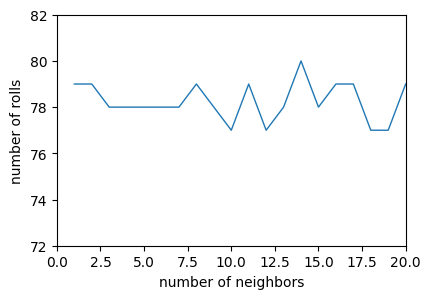

In [290]:
plt.figure(figsize=(4.5,3))
plt.plot(x, y, linewidth=1.0)
plt.axis((0, 20, 72, 82))
plt.xlabel("number of neighbors")
plt.ylabel("number of rolls")

In [277]:
bestNumberOfChilds = 10

In [297]:
x, y = [], []
for i in range(25):
    hilmClimbing = HillClimbing(PermutationMethods.permutateRolls)
    hilmClimbing.NUMBER_OF_NEIGHBORS = bestNumberOfChilds
    hilmClimbing.HILL_CLIMBING_MAX_ITERATION = (i+1) * 400
    x.append((i+1) * 400)
    y.append(hilmClimbing.execute(2))

Text(0, 0.5, 'number of rolls')

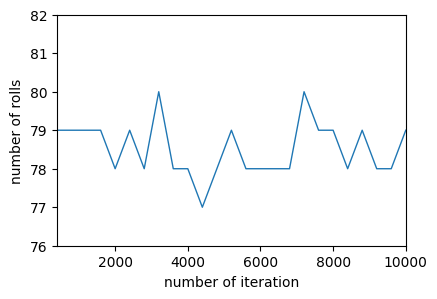

In [300]:
plt.figure(figsize=(4.5,3))
plt.plot(x, y, linewidth=1.0)
plt.axis((400, 10000, 76, 82))
plt.xlabel("number of iteration")
plt.ylabel("number of rolls")

In [301]:
bestNumberOfIterations = 4400

In [304]:
hilmClimbing = HillClimbing(PermutationMethods.permutateRolls)
hilmClimbing.HILL_CLIMBING_MAX_ITERATION = bestNumberOfIterations
hilmClimbing.NUMBER_OF_NEIGHBORS = bestNumberOfChilds
for inputId in range(1,5):
    hilmClimbing.execute(inputId)

Rolls number for input  1  is :  50
Rolls number for input  2  is :  78
Rolls number for input  3  is :  95
Rolls number for input  4  is :  211


### Seamulate Annealing


This algorithm is generally designed and implemented similarly to the previous one, with one main difference: instead of selecting multiple candidates per iteration, it generates a single candidate. However, this algorithm also incorporates some random moves to help avoid getting stuck in local optima and improve the chances of finding a global solution.

The algorithm doesn’t require extensive explanation, as it mostly uses functions introduced in the course. Various parameters, including different values for T, were tested to find the optimal configuration, and the results are displayed.

Additionally, this algorithm was significantly faster than the previous one.

Now, let's focus on finding the best parameters.

In [310]:
x , y = [], []
for i in range(7):
    tMin = 1
    for _ in range(i+1):
        tMin = tMin /10 
    x.append(tMin)
    sa = SimulateAnnealing(tMin=tMin, initialT= 100000.0, coolingRate= 0.99, neighborPrmutationFunc=PermutationMethods.permutateRolls)
    y.append(sa.execute(2))

Text(0, 0.5, 'number of rolls')

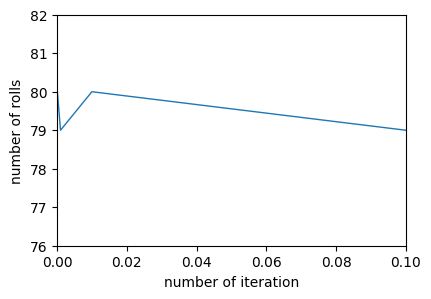

In [312]:
plt.figure(figsize=(4.5,3))
plt.plot(x, y, linewidth=1.0)
plt.axis((0, 0.1, 76, 82))
plt.xlabel("number of iteration")
plt.ylabel("number of rolls")

In [313]:
bestTMin = x[0]

In [314]:
x , y = [], []
for i in [0.97, 0.98, 0.99, 0.995 , 0.999, 0.9999]:
    sa = SimulateAnnealing(tMin=bestTMin, initialT= 100000.0, coolingRate= i, neighborPrmutationFunc=PermutationMethods.permutateRolls)
    y.append(sa.execute(2))

Text(0, 0.5, 'number of rolls')

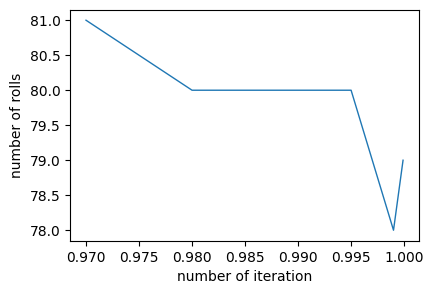

In [317]:
plt.figure(figsize=(4.5,3))
plt.plot(x, y, linewidth=1.0)
plt.xlabel("number of iteration")
plt.ylabel("number of rolls")


In [318]:
bestCoolingRate = 0.9999

In [321]:
for inputId in range(1,5):
    sa = SimulateAnnealing(tMin=bestTMin, initialT= 100000.0, coolingRate= bestCoolingRate, neighborPrmutationFunc=PermutationMethods.permutateRolls)
    sa.execute(inputId)

Rolls number for input  1  is :  51
Rolls number for input  2  is :  78
Rolls number for input  3  is :  94
Rolls number for input  4  is :  210


### Genetic Algorithm


This evolution-inspired algorithm starts by generating 100 random permutations of the input request indices to serve as the initial population (the value 100 is a parameter that yielded the best results after testing alternatives like 70 and 80).

In each generation, we create a new population of the same size by producing offspring to replace the current population.

To do this, we select half of the population as parent pairs using a tournament selection method: nine members are randomly chosen, and the one with the fewest penalty points becomes a parent.

Each parent pair has three possible outcomes in an iteration:

1. **Mutation**: With a 20% probability (determined through testing), we apply mutation by randomly swapping two pairs of elements in one of the parents.
2. **No Change**: With a 30% probability, we leave the parent unchanged.
3. **Crossover**: With a 50% probability, two random indices are generated, and we combine elements from one parent within these indices with elements from the other parent outside of them to create two offspring.

This process repeats for 2000 generations (an empirically chosen number), after which the best (most optimized) offspring with the fewest penalty points is selected as the final result.


The parameters used for the genetic algorithm were thoroughly tested to ensure optimal values. I tested various configurations, but due to the algorithm's length and time consumption, my laptop would freeze and slow down when generating plots. To work around this, I manually adjusted different values one by one, and the current parameters represent the best possible results I achieved.

##### $Author: Mohammad Zamani$

##### $StuNumber: 610399135$
